## Imports

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 2304)
(12660,)
(4170, 2304)
(4170,)


## Preprocessing

In [5]:
# Combinging data with labels

y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)


In [6]:
# Randomises row order in a reproducable way 
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)

In [7]:
# Split data and lables that have undergone the same randomization process
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)

In [8]:
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255

In [9]:
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [10]:
x_train.shape

(12660, 784)

In [11]:
# # Creating 10 bins for output
# y_train = to_categorical(y_train,10)
# y_test = to_categorical(y_test,10)

# print(y_train.shape) 
# print(y_test.shape)

## Linear Classifier - Logistic Regression

In [12]:
lr = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(x_train, y_train)


In [13]:
lc = lr.predict(x_test)

In [14]:
from scipy.stats import mode
labels = np.zeros_like(lc)
for j in range(10):
    mask = (lc == j)
    labels[mask] = mode(y_test[mask])[0]     

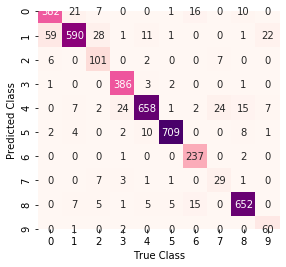

In [15]:
#Display heat map showing predicted class vs the actual lable
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [16]:
#Returns accuarcy score
accuracy_score(y_test, labels)

0.9122302158273381

In [17]:
print(classification_report(y_test,labels))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       450
         1.0       0.83      0.94      0.88       630
         2.0       0.87      0.67      0.76       150
         3.0       0.98      0.92      0.95       420
         4.0       0.89      0.95      0.92       690
         5.0       0.96      0.98      0.97       720
         6.0       0.99      0.88      0.93       270
         7.0       0.69      0.48      0.57        60
         8.0       0.94      0.94      0.94       690
         9.0       0.95      0.67      0.78        90

    accuracy                           0.91      4170
   macro avg       0.90      0.83      0.86      4170
weighted avg       0.91      0.91      0.91      4170



## Buiding MLP Architecture

In [18]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape) 
print(y_test.shape)

(12660, 10)
(4170, 10)


In [19]:
# Specifying Sequential Model
model = Sequential()

In [20]:
# Dense Adds fully connected nodes in each layer 

# Input layer is the number of pixels & their values 

# Layer 1
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))


## Compiling the model

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Visualising ANN arcitecture. (Takes a long time to run!)

In [23]:
# https://towardsdatascience.com/visualizing-artificial-neural-networks-anns-with-just-one-line-of-code-b4233607209e
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")

In [24]:
y_train.shape

(12660, 10)

## Training the Model

In [25]:
trained_network_output = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 4s 318us/step - loss: 0.8357 - accuracy: 0.7324 - val_loss: 0.6874 - val_accuracy: 0.7532
Epoch 2/20
12660/12660 [==============================] - 4s 304us/step - loss: 0.3740 - accuracy: 0.8741 - val_loss: 0.4575 - val_accuracy: 0.8775
Epoch 3/20
12660/12660 [==============================] - 3s 256us/step - loss: 0.2880 - accuracy: 0.9070 - val_loss: 0.4985 - val_accuracy: 0.8760
Epoch 4/20
12660/12660 [==============================] - 3s 247us/step - loss: 0.2237 - accuracy: 0.9261 - val_loss: 0.4845 - val_accuracy: 0.8602
Epoch 5/20
12660/12660 [==============================] - 3s 242us/step - loss: 0.2116 - accuracy: 0.9326 - val_loss: 0.4659 - val_accuracy: 0.8933
Epoch 6/20
12660/12660 [==============================] - 3s 235us/step - loss: 0.1586 - accuracy: 0.9430 - val_loss: 0.3287 - val_accuracy: 0.9197
Epoch 7/20
12660/12660 [==============================] - 3s 24

# Evaluation

### Accuracy of training model

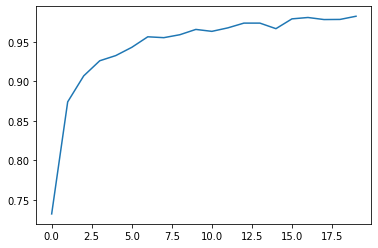

In [26]:
plt.plot(trained_network_output.history['accuracy'])

### Accuracy of training and validation set

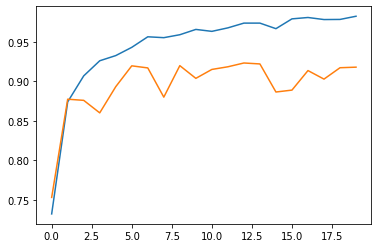

In [27]:
plt.plot(trained_network_output.history['accuracy'])
plt.plot(trained_network_output.history['val_accuracy'])

In [28]:
# Evalutation the model
score = model.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 37us/step


In [29]:
score
# 90% accuaracy!!!

[0.42221398572805974, 0.9179856181144714]

## 10-fold cross valiadation

In [30]:
def construct_new_model():
    model = Sequential()
    # Dense Adds fully connected nodes in each layer 

    # Input layer is the number of pixels & their values 

    # Layer 1
    model.add(Dense(512, activation = 'relu',input_shape=(784,)))

    # Layer 2
    model.add(Dense(512, activation = 'relu'))
    
    #Output Layer
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

    

In [31]:
# Uniformly separates classes in folds: See video @12:00 https://www.youtube.com/watch?v=gJo0uNL-5Qw
# Proportion of classes is same accross all folds
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [32]:
# https://www.youtube.com/watch?v=gJo0uNL-5Qw - Used to make code more concise 
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))
    return model.evaluate(x_test, y_test)

In [33]:
def get_network_output(model, x_train, x_test, y_train, y_test):
    x = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))
    return x

In [34]:
ScoreArray = []

In [35]:
#https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train.argmax(1))):
    x_train_kf, x_test_kf = x_train[train_index], x_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    ScoreArray.append(get_score(construct_new_model(), x_train_kf, x_test_kf, y_train_kf, y_test_kf))
    #ScoreArray.append(get_score(model, x_train_kf, x_test_kf, y_train_kf, y_test_kf))


Train on 11394 samples, validate on 1266 samples
Epoch 1/5
11394/11394 [==============================] - 3s 271us/step - loss: 0.8595 - accuracy: 0.7255 - val_loss: 0.6052 - val_accuracy: 0.7844
Epoch 2/5
11394/11394 [==============================] - 3s 274us/step - loss: 0.4041 - accuracy: 0.8672 - val_loss: 0.2851 - val_accuracy: 0.9100
Epoch 3/5
11394/11394 [==============================] - 3s 275us/step - loss: 0.3017 - accuracy: 0.9042 - val_loss: 0.4814 - val_accuracy: 0.8333
Epoch 4/5
11394/11394 [==============================] - 3s 268us/step - loss: 0.2526 - accuracy: 0.9232 - val_loss: 0.1905 - val_accuracy: 0.9392
Epoch 5/5
1266/1266 [==============================] - 0s 65us/step
Train on 11394 samples, validate on 1266 samples
Epoch 1/5
11394/11394 [==============================] - 3s 282us/step - loss: 0.8779 - accuracy: 0.7258 - val_loss: 0.9700 - val_accuracy: 0.7006
Epoch 2/5
11394/11394 [==============================] - 3s 264us/step - loss: 0.4356 - accuracy: 0

Epoch 5/5
1266/1266 [==============================] - 0s 73us/step


In [36]:
ScoreArray = np.array(ScoreArray)
ScoreArray[:,1:2]

array([[0.93759876],
       [0.90205371],
       [0.93838865],
       [0.92338073],
       [0.92890996],
       [0.79541862],
       [0.85387045],
       [0.93917853],
       [0.91469193],
       [0.92812008]])

In [37]:
# Average accuracy across the 10 folds
print(np.mean(ScoreArray[:,1:2]))

0.9061611413955688


# Moving 4000 images from training to test set

In [38]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 784)
(12660, 10)
(4170, 784)
(4170, 10)


In [39]:
x_train_new = x_train[0:8660,:]
y_train_new = y_train[0:8660,:]

x_temp = x_train[8660:12660,:]
y_temp = y_train[8660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))





In [40]:
test = get_network_output(construct_new_model(), x_train_new, x_test_new, y_train_new, y_test_new)

Train on 8660 samples, validate on 8170 samples
Epoch 1/20
8660/8660 [==============================] - 3s 397us/step - loss: 1.0052 - accuracy: 0.6838 - val_loss: 0.5202 - val_accuracy: 0.8186
Epoch 2/20
8660/8660 [==============================] - 3s 384us/step - loss: 0.4302 - accuracy: 0.8587 - val_loss: 0.5772 - val_accuracy: 0.8022
Epoch 3/20
8660/8660 [==============================] - 3s 375us/step - loss: 0.3303 - accuracy: 0.8860 - val_loss: 0.9495 - val_accuracy: 0.7636
Epoch 4/20
8660/8660 [==============================] - 3s 373us/step - loss: 0.2700 - accuracy: 0.9114 - val_loss: 0.4145 - val_accuracy: 0.8705
Epoch 5/20
8660/8660 [==============================] - 3s 375us/step - loss: 0.2551 - accuracy: 0.9137 - val_loss: 0.2861 - val_accuracy: 0.9131
Epoch 6/20
8660/8660 [==============================] - 3s 388us/step - loss: 0.2075 - accuracy: 0.9315 - val_loss: 0.3250 - val_accuracy: 0.9064
Epoch 7/20
8660/8660 [==============================] - 4s 435us/step - loss

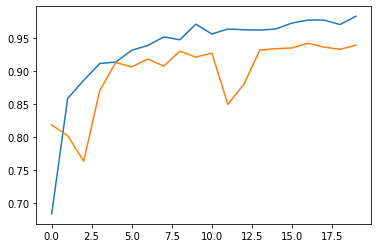

In [41]:
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])

# Moving 9000 images from training to test set


In [42]:
x_train_new = x_train[0:6660,:]
y_train_new = y_train[0:6660,:]

x_temp = x_train[6660:12660,:]
y_temp = y_train[6660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))

In [43]:
test2 = get_network_output(construct_new_model(), x_train_new, x_test_new, y_train_new, y_test_new)

Train on 6660 samples, validate on 10170 samples
Epoch 1/20
6660/6660 [==============================] - 3s 450us/step - loss: 1.1505 - accuracy: 0.6339 - val_loss: 0.8409 - val_accuracy: 0.7175
Epoch 2/20
6660/6660 [==============================] - 3s 422us/step - loss: 0.5141 - accuracy: 0.8276 - val_loss: 0.5633 - val_accuracy: 0.7997
Epoch 3/20
6660/6660 [==============================] - 3s 423us/step - loss: 0.3795 - accuracy: 0.8734 - val_loss: 0.4135 - val_accuracy: 0.8708
Epoch 4/20
6660/6660 [==============================] - 3s 469us/step - loss: 0.3258 - accuracy: 0.8926 - val_loss: 0.3577 - val_accuracy: 0.9002
Epoch 5/20
6660/6660 [==============================] - 4s 542us/step - loss: 0.2543 - accuracy: 0.9221 - val_loss: 0.3386 - val_accuracy: 0.9032
Epoch 6/20
6660/6660 [==============================] - 4s 529us/step - loss: 0.2182 - accuracy: 0.9302 - val_loss: 0.3350 - val_accuracy: 0.9099
Epoch 7/20
6660/6660 [==============================] - 4s 586us/step - los

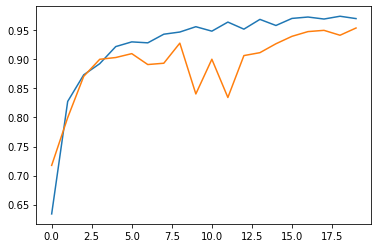

In [44]:
plt.plot(test2.history['accuracy'])
plt.plot(test2.history['val_accuracy'])